# Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [2]:
carprice = pd.read_csv('CarPrice_Assignment.csv', index_col=0)
carprice

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [3]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [4]:
price = carprice['price']

In [5]:
# del carprice['CarName']
# del carprice['price']
# del carprice['fueltype']
# del carprice['aspiration']
# del carprice['doornumber']
# del carprice['carbody']
# del carprice['drivewheel']
# del carprice['enginelocation']
# del carprice['enginetype']
# del carprice['cylindernumber']
# del carprice['fuelsystem']

In [6]:
# carprice.info()

In [7]:
fueltype=pd.get_dummies(carprice['fueltype'])
aspiration=pd.get_dummies(carprice['aspiration'])
doornumber=pd.get_dummies(carprice['doornumber'])
carbody=pd.get_dummies(carprice['carbody'])
drivewheel=pd.get_dummies(carprice['drivewheel'])
enginelocation=pd.get_dummies(carprice['enginelocation'])
enginetype=pd.get_dummies(carprice['enginetype'])
cylindernumber=pd.get_dummies(carprice['cylindernumber'])
fuelsystem=pd.get_dummies(carprice['fuelsystem'])

In [8]:
price = carprice['price']

del carprice['CarName']
del carprice['price']

data = pd.concat([carprice, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem], axis=1)
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0
202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,0,0,0,0,0,0,0,1,0,0


In [9]:
del data['fueltype']
del data['aspiration']
del data['doornumber']
del data['carbody']
del data['drivewheel']
del data['enginelocation']
del data['enginetype']
del data['cylindernumber']
del data['fuelsystem']

In [10]:
data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,twelve,two,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# 심층 신경망
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    return model

model = build_model(num_input=52)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6784      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________


In [12]:
from sklearn.model_selection import train_test_split

X_data = data
y_data = price

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)


X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, 
                                                    y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(164, 52) (164,)
(41, 52) (41,)


In [13]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
6/6 - 1s - loss: 253124208.0000 - mae: 13649.5840 - 984ms/epoch - 164ms/step
Epoch 2/100
6/6 - 0s - loss: 253036496.0000 - mae: 13646.3535 - 15ms/epoch - 2ms/step
Epoch 3/100
6/6 - 0s - loss: 252856224.0000 - mae: 13639.7031 - 20ms/epoch - 3ms/step
Epoch 4/100
6/6 - 0s - loss: 252513552.0000 - mae: 13627.2773 - 113ms/epoch - 19ms/step
Epoch 5/100
6/6 - 0s - loss: 251948752.0000 - mae: 13606.3594 - 21ms/epoch - 3ms/step
Epoch 6/100
6/6 - 0s - loss: 251029856.0000 - mae: 13573.5020 - 22ms/epoch - 4ms/step
Epoch 7/100
6/6 - 0s - loss: 249796960.0000 - mae: 13527.7793 - 21ms/epoch - 3ms/step
Epoch 8/100
6/6 - 0s - loss: 248064704.0000 - mae: 13464.7119 - 21ms/epoch - 4ms/step
Epoch 9/100
6/6 - 0s - loss: 245636240.0000 - mae: 13376.3799 - 33ms/epoch - 5ms/step
Epoch 10/100
6/6 - 0s - loss: 242611504.0000 - mae: 13265.8418 - 38ms/epoch - 6ms/step
Epoch 11/100
6/6 - 0s - loss: 238923424.0000 - mae: 13125.0273 - 26ms/epoch - 4ms/step
Epoch 12/100
6/6 - 0s - loss: 234153552.0000 - 

Epoch 97/100
6/6 - 0s - loss: 11702958.0000 - mae: 2424.4897 - 22ms/epoch - 4ms/step
Epoch 98/100
6/6 - 0s - loss: 11470839.0000 - mae: 2388.1406 - 20ms/epoch - 3ms/step
Epoch 99/100
6/6 - 0s - loss: 11386003.0000 - mae: 2377.9971 - 59ms/epoch - 10ms/step
Epoch 100/100
6/6 - 0s - loss: 11259348.0000 - mae: 2400.8105 - 43ms/epoch - 7ms/step


In [14]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 13245930.0000 - mae: 2280.3025


[13245930.0, 2280.302490234375]

In [15]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50,
                    validation_split=0.25, verbose=2)

Epoch 1/50
4/4 - 0s - loss: 9866892.0000 - mae: 2257.0312 - val_loss: 15612444.0000 - val_mae: 2678.4912 - 66ms/epoch - 17ms/step
Epoch 2/50
4/4 - 0s - loss: 9622206.0000 - mae: 2207.3745 - val_loss: 15503185.0000 - val_mae: 2663.8201 - 42ms/epoch - 10ms/step
Epoch 3/50
4/4 - 0s - loss: 9588703.0000 - mae: 2213.0652 - val_loss: 15435838.0000 - val_mae: 2654.0603 - 46ms/epoch - 11ms/step
Epoch 4/50
4/4 - 0s - loss: 9419903.0000 - mae: 2181.9324 - val_loss: 15160682.0000 - val_mae: 2668.0654 - 39ms/epoch - 10ms/step
Epoch 5/50
4/4 - 0s - loss: 9321418.0000 - mae: 2169.9475 - val_loss: 15254306.0000 - val_mae: 2641.4482 - 47ms/epoch - 12ms/step
Epoch 6/50
4/4 - 0s - loss: 9295217.0000 - mae: 2158.8801 - val_loss: 15085256.0000 - val_mae: 2647.6799 - 50ms/epoch - 12ms/step
Epoch 7/50
4/4 - 0s - loss: 9354880.0000 - mae: 2157.0859 - val_loss: 15009619.0000 - val_mae: 2647.9470 - 54ms/epoch - 14ms/step
Epoch 8/50
4/4 - 0s - loss: 9107263.0000 - mae: 2134.1243 - val_loss: 15032353.0000 - val_

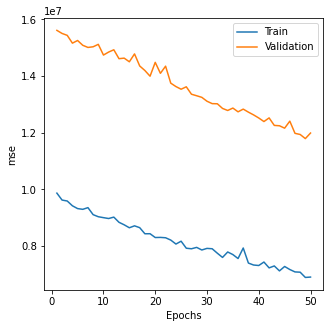

In [17]:
import matplotlib.pyplot as plt
def plot_loss_curve(total_epoch=10, start=1):
    plt.figure(figsize=(5, 5))
    plt.plot(range(start, total_epoch + 1), 
             history.history['loss'][start-1:total_epoch], 
             label='Train')
    plt.plot(range(start, total_epoch + 1), 
             history.history['val_loss'][start-1:total_epoch], 
             label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

plot_loss_curve(total_epoch=50, start=1)

In [ ]:
plot_loss_curve(total_epoch=, start=)